In [107]:
'''!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install imbalanced-learn
!pip install seaborn
!pip install matplotlib'''

'!pip install pandas\n!pip install numpy\n!pip install scikit-learn\n!pip install imbalanced-learn\n!pip install seaborn\n!pip install matplotlib'

In [108]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.pipeline import Pipeline

<b>Data<b>

In [109]:
df = pd.read_csv("./data/heart.csv")

print(df.shape)
df.dtypes


(918, 12)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [110]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [111]:
sex = {
    'M' : 0,
    'H' : 1
}
Chest_Pain_Type ={
    'ASY':0,
    'NAP':1,
    'ATA':2,
    'TA':3
}
Resting_ECG = {
    'Normal':0,
    'LVH':1,
    'ST':2
}
Exercise_Angina ={
    'N':0,
    'Y':1
}
St_Slope ={
    'Flat':0,
    'Up':1,
    'Down':2
}

In [112]:
df['sex'] = df['Sex'].map(sex)
df['Chest_Pain_Type'] = df['ChestPainType'].map(Chest_Pain_Type)
df['Resting_ECG'] = df['RestingECG'].map(Resting_ECG)
df['Exercise_Angina'] = df['ExerciseAngina'].map(Exercise_Angina)
df['St_Slope'] = df['ST_Slope'].map(St_Slope)

In [113]:
df = df.fillna(0)

print(f"Columns name: {df.columns}")
print(df.dtypes)
df['HeartDisease'].value_counts()

Columns name: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'sex', 'Chest_Pain_Type', 'Resting_ECG',
       'Exercise_Angina', 'St_Slope'],
      dtype='object')
Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
sex                float64
Chest_Pain_Type      int64
Resting_ECG          int64
Exercise_Angina      int64
St_Slope             int64
dtype: object


HeartDisease
1    508
0    410
Name: count, dtype: int64

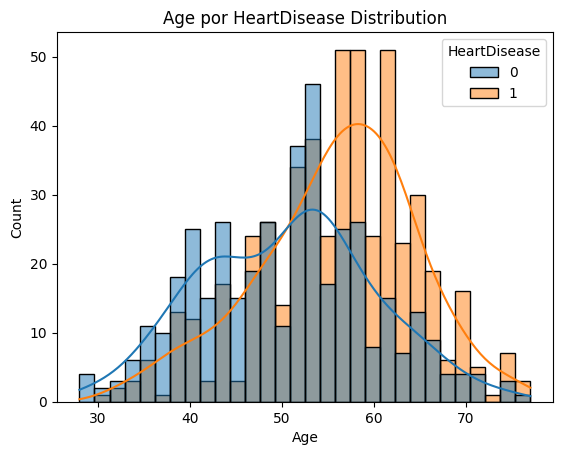

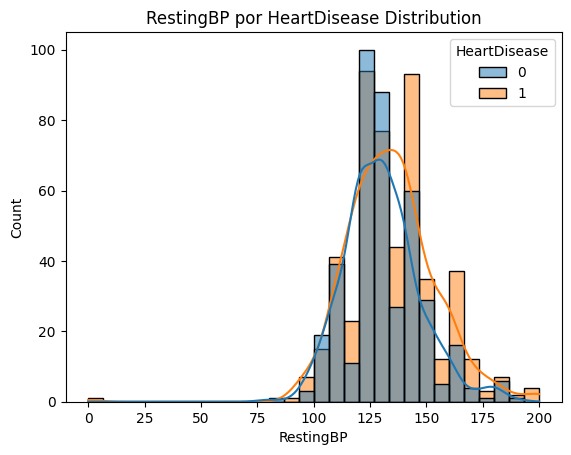

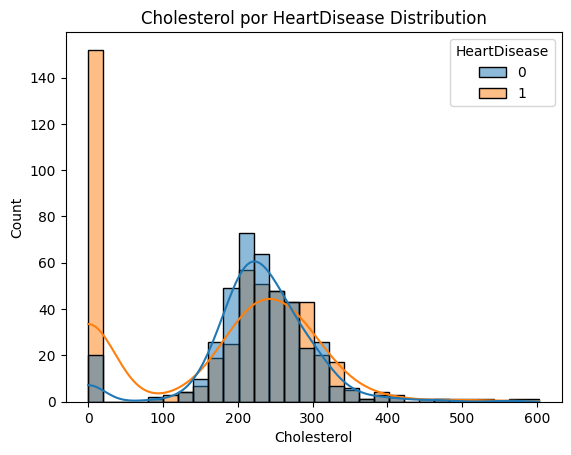

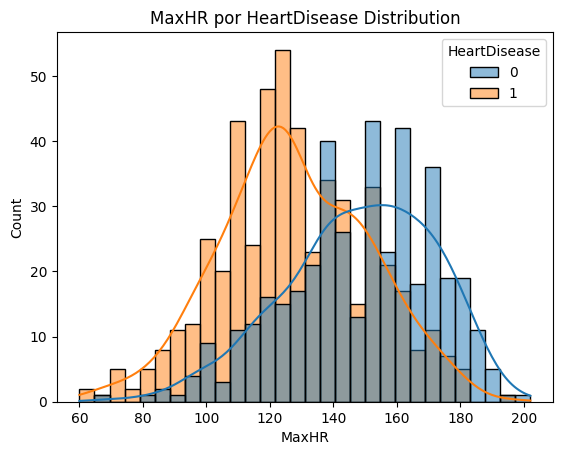

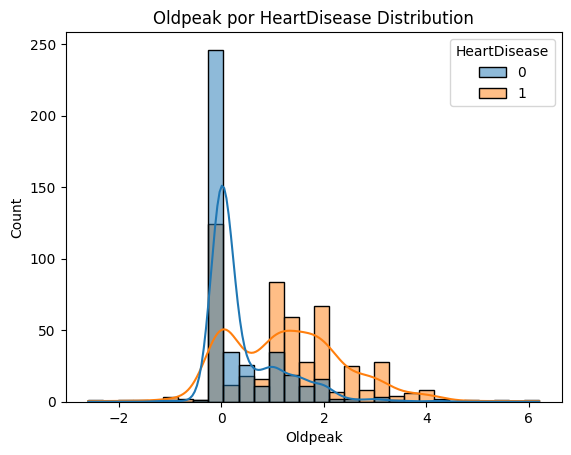

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in num_cols:
    sns.histplot(data=df, x=col, hue='HeartDisease', kde=True, bins=30)
    plt.title(f'{col} por HeartDisease Distribution')
    plt.show()

In [115]:
X = df[['Age','sex','Chest_Pain_Type','RestingBP','Cholesterol','FastingBS','Resting_ECG','MaxHR','Exercise_Angina','Oldpeak','St_Slope']].values
y = df[['HeartDisease']].values

Test Split

In [116]:
#30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (642, 11) (642, 1)
Test set: (276, 11) (276, 1)


Smote

In [117]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Normalize data

In [118]:
scaler = preprocessing.StandardScaler()
X_train_resampled= scaler.fit(X_train_smote).transform(X_train_smote.astype(float))
X_test = scaler.transform(X_test.astype(float))

<b>Random Forest<b>

In [119]:
#hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [120]:
#Creating a RF classifier
clf = RandomForestClassifier(random_state=42)

clf_grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#training the model
clf_grid_search.fit(X_train_resampled, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [121]:
#test
y_pred = clf_grid_search.predict(X_test)
print(f"Predicción: {y_pred[0:10]}")
print(f"Y Test    : {y_test[0:10].ravel()}")

Predicción: [0 1 0 0 0 1 1 1 0 0]
Y Test    : [0 1 0 0 0 1 1 1 0 0]


In [122]:
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.8731884057971014


<b>Support Vector Machine<b>

In [123]:
svc = SVC() 

In [124]:
pipeline = Pipeline([
    ('svm', svc)         # Modelo SVM
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  }

In [125]:
SVC_gridsearch = GridSearchCV(estimator=pipeline, param_grid= param_grid, cv =5, scoring='accuracy', verbose=1, n_jobs=-1)
SVC_gridsearch.fit(X_train_resampled, y_train_smote) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('svm', SVC())]), n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [129]:
y_pred_SVM = SVC_gridsearch.predict(X_test)
print(f"Predicción: {y_pred_SVM[0:10]}")
print(f"Y Test    : {y_test[0:10].ravel()}")

Predicción: [0 1 0 0 0 1 1 1 0 0]
Y Test    : [0 1 0 0 0 1 1 1 0 0]


In [127]:
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred_SVM))

ACCURACY OF THE MODEL: 0.9094202898550725
